# SVM Margins example

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

In [2]:
# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

In [3]:
print(f"X:\n{X}.\nY:\n{Y}")

X:
[[-0.23594765 -1.59984279]
 [-1.02126202  0.2408932 ]
 [-0.13244201 -2.97727788]
 [-1.04991158 -2.15135721]
 [-2.10321885 -1.5894015 ]
 [-1.85595643 -0.54572649]
 [-1.23896227 -1.87832498]
 [-1.55613677 -1.66632567]
 [-0.50592093 -2.20515826]
 [-1.6869323  -2.85409574]
 [-4.55298982 -1.3463814 ]
 [-1.1355638  -2.74216502]
 [ 0.26975462 -3.45436567]
 [-1.95424148 -2.18718385]
 [-0.46722079 -0.53064123]
 [-1.84505257 -1.62183748]
 [-2.88778575 -3.98079647]
 [-2.34791215 -1.84365103]
 [-0.76970932 -0.79762015]
 [-2.38732682 -2.30230275]
 [ 0.95144703  0.57998206]
 [ 0.29372981  3.9507754 ]
 [ 1.49034782  1.5619257 ]
 [ 0.74720464  2.77749036]
 [ 0.38610215  1.78725972]
 [ 1.10453344  2.3869025 ]
 [ 1.48919486  0.81936782]
 [ 1.97181777  2.42833187]
 [ 2.06651722  2.3024719 ]
 [ 1.36567791  1.63725883]
 [ 1.32753955  1.64044684]
 [ 1.18685372  0.2737174 ]
 [ 2.17742614  1.59821906]
 [ 0.36980165  2.46278226]
 [ 1.09270164  2.0519454 ]
 [ 2.72909056  2.12898291]
 [ 3.13940068  0.76517418

w:
[0.90230696 0.64821811].
a:
-1.391980476255765.
xx:
[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ].
yy:
[ 7.32169617  7.03761852  6.75354087  6.46946322  6.18538558  5.90130793
  5.61723028  5.33315263  5.04907498  4.76499733  4.48091969  4.19684204
  3.91276439  3.62868674  3.34460909  3.06053144  2.7764538   2.49237615
  2.2082985   1.92422085  1.6401432   1.35606556  1.07198791  0.78791026
  0.50383261  0.21975496 -0.06432269 -

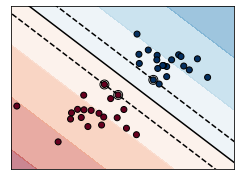

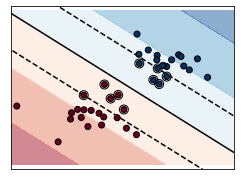

In [11]:
# A través del for, se van a crear diferentes figuras. Definimos fignum
fignum = 1
# Iteramos los nombres unreg/reg con una penalidad de 1/0.5 respectivamente
for name, penalty in (("unreg", 1), ("reg", 0.05)):

    # SVM con Kernel Linear y penalidad (1/.05)
    clf = svm.SVC(kernel="linear", C=penalty)
    # Fit del Modelo
    clf.fit(X, Y)

    # Obtenemos la separación del Hiperplano
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # Grafica de los paralelos a la separacion del hiperplano que pasa a 
    # traves de los vectores de soporte (se alejan del margen del hiperplano
    # en direccion perpendicular al hiperplano)
    # Esto es un espacio de sqrt(1+a^2) en el plano 2d
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin
    #Visualizar variables: 
    for variable, value in (("w",w),("a",a),("xx",xx),("yy",yy)):
      print(f"{variable}:\n{value}.")

    # Grafica de la linea, los puntos y los vectores más cercanos al plano.
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=cm.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

Los gráficos plot arriba ilustran el efecto que el parametro `C` tiene en la linea de separación. Un valor largo de `C` basicamente le dice a nuestro modelo que no hay mucha fe en la distribución d elos datos, y que considerará solamente puntos cercanos a la linea de separación.
Un valor pequeño de `C` incluye más o todas las observaciones, lo que permite que los margenes sean calculados usando todos los datos en el area. 